<a href="https://colab.research.google.com/github/Aakriti555/Udemy_deepLearning/blob/main/CNN_CIFAR_improve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D , Dropout , Input , GlobalMaxPooling2D , BatchNormalization , MaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train , y_train), (x_test , y_test) = cifar10.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0
y_train , y_test = y_train.flatten() , y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [ ]:
# Build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3),  activation='relu' , padding ='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3),  activation='relu', padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding ='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3),  activation='relu', padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding ='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3),  activation='relu', padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# compile and fit
# note: make sure to use GPU
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
r = model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.4473 - loss: 2.0985 - val_accuracy: 0.5837 - val_loss: 1.1607
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.6398 - loss: 1.0384 - val_accuracy: 0.5841 - val_loss: 1.2274
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7226 - loss: 0.8001 - val_accuracy: 0.6249 - val_loss: 1.1733
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7855 - loss: 0.6244 - val_accuracy: 0.5956 - val_loss: 1.4265
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8380 - loss: 0.4774 - val_accuracy: 0.6026 - val_loss: 1.3848
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8736 - loss: 0.3827 - val_accuracy: 0.6067 - val_loss: 1.5787
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8929 - loss: 0.3261 - val_accuracy: 0.6501 - val_loss: 1.4234
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9056 -

In [ ]:
# fit with data augmentation '
# note: if you run this after calling the previous model.fit(), it will continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:48 185ms/step - accuracy: 0.5000 - loss: 2.0427

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5259 - loss: 1.4883 - val_accuracy: 0.6252 - val_loss: 1.1863
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5938 - loss: 1.3472

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.5938 - loss: 1.3472 - val_accuracy: 0.6312 - val_loss: 1.1534
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6038 - loss: 1.1626 - val_accuracy: 0.5899 - val_loss: 1.2693
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.5938 - loss: 1.2844 - val_accuracy: 0.5835 - val_loss: 1.3114
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6237 - loss: 1.0877 - val_accuracy: 0.6766 - val_loss: 0.9843
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.6562 - loss: 1.0690 - val_accuracy: 0.6801 - val_loss: 0.9824
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6407 - loss: 1.0390 - val_accuracy: 0.6485 - val_loss: 1.0759
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.5625 - loss: 1.1442 - val_accuracy: 0.6536 - val_loss: 1.0532
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.6491 - loss: 1.01

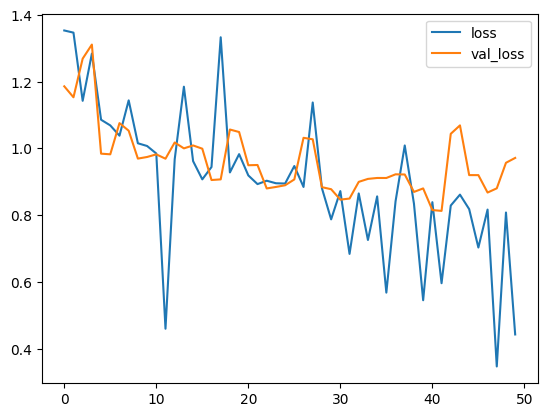

In [ ]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend();

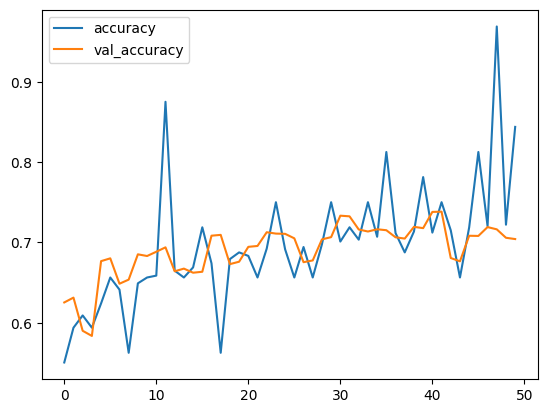

In [ ]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'] , label = 'accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val_accuracy')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[777  24  25   3  25   2  33   6  59  46]
 [ 12 900   2   2   2   1  11   0  22  48]
 [ 70  11 472  25 126  40 192  32  14  18]
 [ 30  27  32 353 113 100 234  34  26  51]
 [ 27   7  24  14 719   8 157  32   6   6]
 [ 20  14  43 124  95 463 157  50  13  21]
 [  7   7  10  14  19   3 937   2   1   0]
 [ 22  11  15  16  70  28  53 761   8  16]
 [ 58  38   2   5   9   1  12   2 836  37]
 [ 29 107   3   1   3   0   4   8  22 823]]


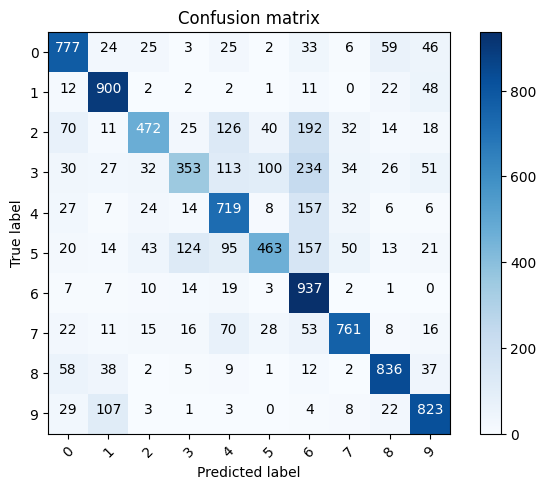

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

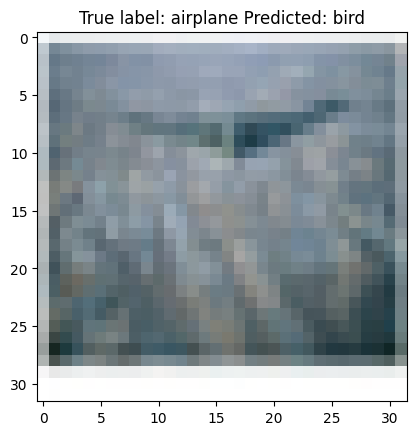

In [ ]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='Oranges')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


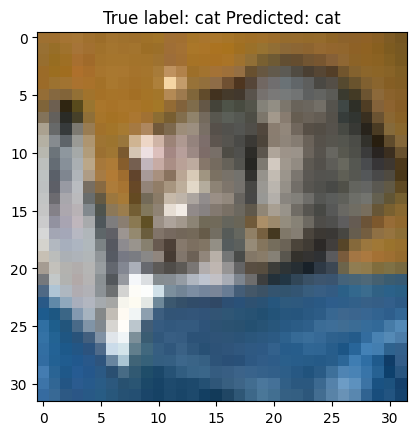

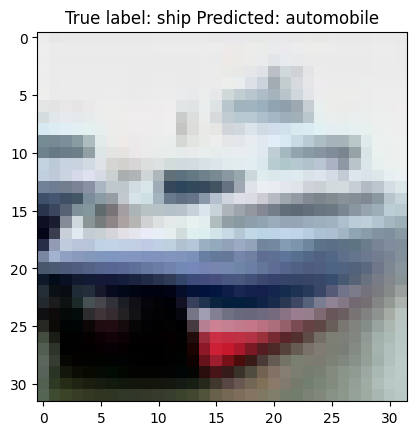

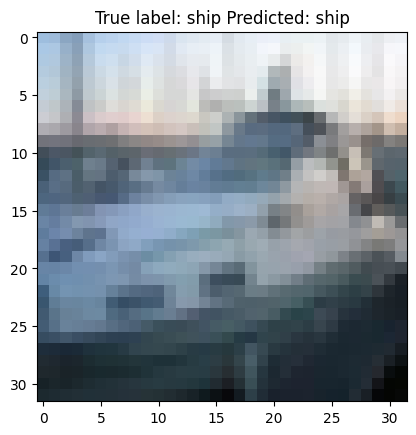

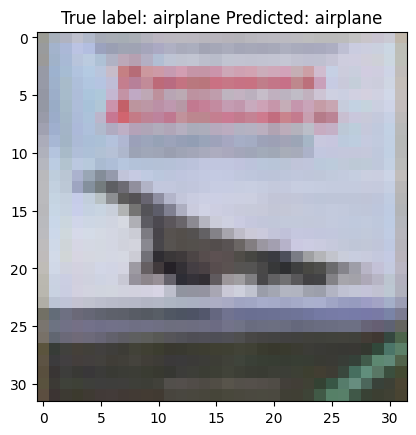

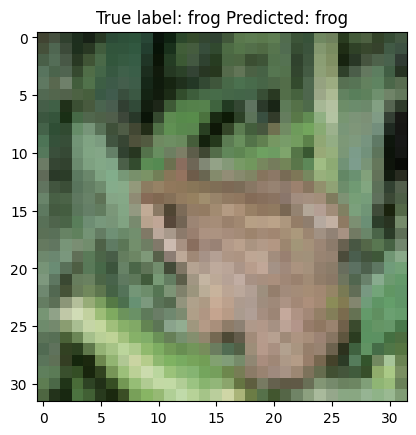

In [ ]:
import numpy as np
# Predict the first few images in the test set
predictions = model.predict(x_test[:5])

# Plot the first few test images, their predicted labels, and the true labels
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    # Predict the first few images in the test set
predictions = model.predict(x_test[:5])

# Plot the first few test images, their predicted labels, and the true labels
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
    plt.show()

In [ ]:
model.summary()